# NN-Subsampling Algorithm

The sampling algorithm is an iterative process based on Nearest Neighbour search. 

In each iteration, the dataset is normalized with the standard scaler (mean = 0, standard deviation = 1) and a nearest-neighbour model is constructed and queried to find the nearest neighbor for each data point as well as the distance between them. If the distance is below a certain cutoff distance, the neighbor is removed with some probability. The process is iterated until there are no more points to be removed. 

The algorithm has two hyper-parameters: cutoff distance and deletion probability (rate). 

The cutoff distance controls the sparsity of the resulting representative dataset. Higher cutoff distances resulting in fewer sub-sampled points.
The deletion probability controls robustness. Lower deletion probablibity is more robust but resulting in slower execution. High deletion probablity might result in a "hole" in the subsampled dataset

High-dimensional datasets may also be pre-processed by principal component analysis (PCA) to reduce the dimensionality prior to subsampling


The illustration of the subsampling procedure is shown in the Figure below

<center>
    <img src="./subsample_schema.JPG" width = 500>
</center>

The Nearest-Neighbour search uses one of the packages below:

* FLANN: http://www.cs.ubc.ca/research/flann/

* pykdtree: https://github.com/storpipfugl/pykdtree

* Annoy: https://github.com/spotify/annoy

* nmslib: https://github.com/nmslib/nmslib/tree/master/python_bindings

* scipy cKDTree

* scikit-learn nearest neighbor

Please make sure you have at least one of these packages installed before trying the algorithm (also remember to specify the method in your script)

Also note that different packages may (sometimes very significantly) in speed, efficiency and result

## importing the functions

In [1]:
from NNSubsampling import subsampling, subsampling_with_PCA, \
                          batch_subsampling, batch_subsampling_with_PCA

## Detailed Explanations of the Functions
### Subsampling

subsampling(data, list_desc = [], standard_scale = True, cutoff_sig = 0.05, rate = 0.3, method = "pykdtree", verbose = 1):
    
    Run the NN-based subsampling algorithm to a list of data points and 
    return the resulting list of subsampled data points
    

    Parameters
    -------------
    data: List. the original list of data points
    
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
    
    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [1]: integer. level of verbosity
    
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

    

### subsampling_with_PCA
subsampling_with_PCA(data, list_desc = [], standard_scale = True, cutoff_sig = 0.05, rate = 0.3, 
                                start_trial_component = 10, max_component = 30, target_variance = 0.999999, 
                                method = "pykdtree", verbose = 1):
    
    Run the NN-based subsampling algorithm to a list of data points and 
    return the resulting list of subsampled data points
    
    The data set will first be transformed by PCA, before running the subsampling algorithm
    The number of PCs kept is the minimal number of PCs that have sum explained variance 
    greater than target_variance 
    
    Note that the final resulting list of datapoints (sampling_result) is NOT transformed
    (since we only used the PCA + subsampling alghorithm to find the indices of the datapoints to be kept)
    

    Parameters
    -------------
    data: List. the original list of data points
   
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
    
    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    start_trial_component [10]: Int. minimum number of PCs.
                           if the number of features is below this number, then all features will be kept
    
    max_component [30]: Int.the maximum number of PCs to be kept, 
                        even the target variance has not been reached
    
    target_variance [0.999999]: Float. the target sum of variance. 
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [1]: integer. level of verbosity
    
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

### batch_subsampling
batch_subsampling(data, list_desc = [], batch_size = 1000000, recursive_level = 1, 
                             standard_scale = True, cutoff_sig = 0.05, rate = 0.3, method = "pykdtree", 
                             verbose = 1, shuffle = True, final_overall_subsample = True):

    Subsample with batch
    This is to save the memory if the data set of interest is too large.
    
    The data set will first be broken down into equally sized batchs (defined by batch size)
    that will be subsampled individually.
    The resulting subsampled datapoints will then be pooled together for a overall subsample
    
    In case this is not sufficient, multi-level batch subsampling is also allowed.
    So instead of a overall subsample after pooling the resulting subsampled datapoints,
    the pooled data points will again be broken down into batches for a second-level batch subsample.
    This process is repeated multiple times (as defined by recursive_level) before eventually an 
    overall subsample is performed
    
    
    Parameters
    -------------
    data: List. the original list of data points
    
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
                
    batch_size [1000000]: Int. the number of datapoints in each batch
    
    recursive_level [1]: Int. the number of levels for batch subsampling (as described above)

    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [1]: integer. level of verbosity
    
    shuffle [True]: Boolean. whether to shuffle the dataset before breaking down into batchs

    final_overall_subsample [True]: wheter to perform a overall subsample after the levels of batch
                                     subsample are finished
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

### batch_subsampling_with_PCA

batch_subsampling_with_PCA(data, list_desc = [], batch_size = 1000000, recursive_level = 1, 
                             start_trial_component = 10, max_component = 30, target_variance = 0.999999, 
                             standard_scale = True, cutoff_sig = 0.05, rate = 0.3, method = "pykdtree", 
                             verbose = 1, shuffle = True, final_overall_subsample = True):
    
    '''
    Subsample with batch (with PCA pre-processing)
    This is to save the memory if the data set of interest is too large.
    
    The data set will first be broken down into equally sized batchs (defined by batch size)
    that will be subsampled individually.
    The resulting subsampled datapoints will then be pooled together for a overall subsample
    
    In case this is not sufficient, multi-level batch subsampling is also allowed.
    So instead of a overall subsample after pooling the resulting subsampled datapoints,
    the pooled data points will again be broken down into batches for a second-level batch subsample.
    This process is repeated multiple times (as defined by recursive_level) before eventually an 
    overall subsample is performed
    
    
    Parameters
    -------------
    data: List. the original list of data points
    
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
                
    batch_size [1000000]: Int. the number of datapoints in each batch
    
    recursive_level [1]: Int. the number of levels for batch subsampling (as described above)

    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    start_trial_component [10]: Int. minimum number of PCs.
                           if the number of features is below this number, then all features will be kept
    
    max_component [30]: Int.the maximum number of PCs to be kept, 
                        even the target variance has not been reached
    
    target_variance [0.999999]: Float. the target sum of variance. 
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [1]: integer. level of verbosity
    
    shuffle [True]: Boolean. whether to shuffle the dataset before breaking down into batchs

    final_overall_subsample [True]: wheter to perform a overall subsample after the levels of batch
                                     subsample are finished
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

# Tutorial and Tests

### prepare plot function and dataset

Multi-dimensional normal distributed dataset

In [2]:
import time
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
def plot(data):
    
    x_subsampled = data[:,0]
    y_subsampled = data[:,1]

    dataframe = pd.DataFrame({'x':x_subsampled, 'y':y_subsampled, 'group':np.repeat('subsampled',len(x_subsampled))})
    sns.set(font_scale = 2)
    with sns.axes_style('white'):
        g = sns.JointGrid(x="x", y="y",data=dataframe,space=0)
        g = g.plot_joint(plt.scatter, color = "b", s=30)

        g.set_axis_labels(fontsize=50)

        count = lambda a, b: len(a)
        g.annotate(count, template="{val:.0f}",stat="Count",loc="upper right", fontsize = 20)

        _ = g.ax_marg_x.hist(dataframe["x"], color = "b", alpha = 0.6, bins = np.arange(-0.5, 0.5, 0.02))
        _ = g.ax_marg_y.hist(dataframe["y"], color = "b", alpha = 0.6, orientation = "horizontal",bins = np.arange(0, 200, 4))
        plt.show()
    return

n = 1000000
x1_mu, x1_sigma = 0, 0.1
x2_mu, x2_sigma = 100, 20
x3_mu, x3_sigma = 15, 40
x4_mu, x4_sigma = -20, 5
x5_mu, x5_sigma = 1000, 0.1
x6_mu, x7_sigma = 0.0, 30
x7_mu, x6_sigma = 12, 2
x8_mu, x8_sigma = 50, 40
x9_mu, x9_sigma = 5, 20
x10_mu, x10_sigma = 10, 2


x1 = np.random.normal(x1_mu, x1_sigma, n)
x2 = np.random.normal(x2_mu, x2_sigma, n)
x3 = np.random.normal(x3_mu, x3_sigma, n)
x4 = np.random.normal(x4_mu, x4_sigma, n)
x5 = np.random.normal(x5_mu, x5_sigma, n)
x6 = np.random.normal(x6_mu, x6_sigma, n)
x7 = np.random.normal(x7_mu, x7_sigma, n)
x8 = np.random.normal(x8_mu, x8_sigma, n)
x9 = np.random.normal(x9_mu, x9_sigma, n)
x10 = np.random.normal(x10_mu, x10_sigma, n)

data_2D = np.column_stack((x1,x2))
data_5D = np.column_stack((x1,x2,x3,x4,x5))
data_10D = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))

## Tutorials

1,000,000 Multi-dimensional normally distributed data points.

we will only use the "pykdtree" backend in the tutorial

### Tutorial 1: 2D toy case, with different rate and cutoff_sig

1. higher rate --> fewer iterations, faster execution, but less nicely distributed results
2. higher cutoff_sig --> more sparse resulting subsampled datapoints


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


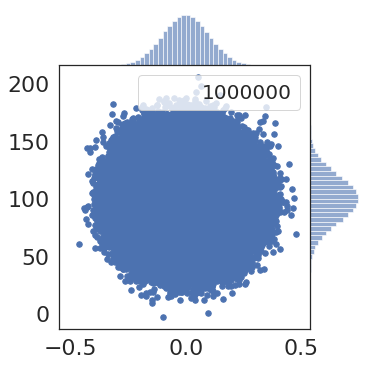

In [3]:
plot(data_2D)

#### subsample with cutoff_sig = 0.05, rate = 0.2

Started NN-subsampling, original length: 1000000
use pykdtree backend
Subample with standard scaled data
start iteration 1, total length: 1000000
end iteration 1. length: 812350	 time:2.315687656402588
start iteration 2, total length: 812350
end iteration 2. length: 660272	 time:2.0455286502838135
start iteration 3, total length: 660272
end iteration 3. length: 537026	 time:1.576935052871704
start iteration 4, total length: 537026
end iteration 4. length: 436966	 time:1.3074495792388916
start iteration 5, total length: 436966
end iteration 5. length: 355797	 time:1.1138415336608887
start iteration 6, total length: 355797
end iteration 6. length: 289731	 time:0.8085100650787354
start iteration 7, total length: 289731
end iteration 7. length: 235973	 time:0.6393141746520996
start iteration 8, total length: 235973
end iteration 8. length: 192187	 time:0.5396528244018555
start iteration 9, total length: 192187
end iteration 9. length: 156613	 time:0.4153478145599365
start iteration 10, tot

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


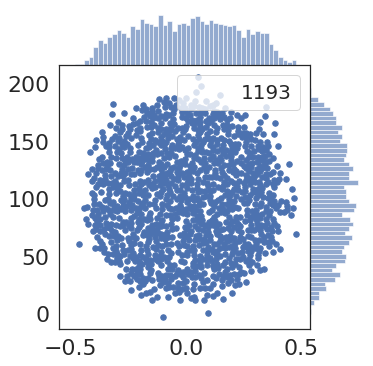

In [4]:
subsampled = np.asarray(subsampling(data_2D,list_desc = [],cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = 2))

plot(subsampled)

#### subsample with cutoff_sig = 0.1, rate = 0.6

Started NN-subsampling, original length: 1000000
use pykdtree backend
Subample with standard scaled data
start iteration 1, total length: 1000000
end iteration 1. length: 506562	 time:2.877286195755005
start iteration 2, total length: 506562
end iteration 2. length: 261576	 time:1.6106669902801514
start iteration 3, total length: 261576
end iteration 3. length: 135515	 time:0.7688300609588623
start iteration 4, total length: 135515
end iteration 4. length: 70379	 time:0.417250394821167
start iteration 5, total length: 70379
end iteration 5. length: 36561	 time:0.21222376823425293
start iteration 6, total length: 36561
end iteration 6. length: 19203	 time:0.10015535354614258
start iteration 7, total length: 19203
end iteration 7. length: 10167	 time:0.05452537536621094
start iteration 8, total length: 10167
end iteration 8. length: 5542	 time:0.031033039093017578
start iteration 9, total length: 5542
end iteration 9. length: 3180	 time:0.016711950302124023
start iteration 10, total leng

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


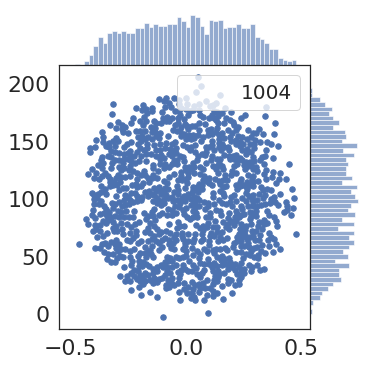

In [5]:
subsampled = np.asarray(subsampling(data_2D,list_desc = [],cutoff_sig=0.1,rate=0.6, method = "pykdtree",verbose = 2))

plot(subsampled)

#### subsample with cutoff_sig = 0.4, rate = 0.2

Started NN-subsampling, original length: 1000000
use pykdtree backend
Subample with standard scaled data
start iteration 1, total length: 1000000
end iteration 1. length: 812302	 time:2.253941774368286
start iteration 2, total length: 812302
end iteration 2. length: 660222	 time:1.9349052906036377
start iteration 3, total length: 660222
end iteration 3. length: 536939	 time:1.593888282775879
start iteration 4, total length: 536939
end iteration 4. length: 436917	 time:1.3058862686157227
start iteration 5, total length: 436917
end iteration 5. length: 355488	 time:1.018061876296997
start iteration 6, total length: 355488
end iteration 6. length: 289263	 time:0.7727367877960205
start iteration 7, total length: 289263
end iteration 7. length: 235597	 time:0.6369292736053467
start iteration 8, total length: 235597
end iteration 8. length: 191938	 time:0.5504209995269775
start iteration 9, total length: 191938
end iteration 9. length: 156266	 time:0.426694393157959
start iteration 10, total

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


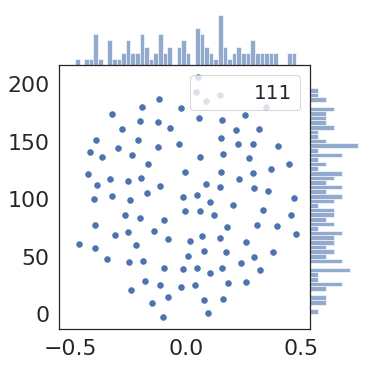

In [6]:
subsampled = np.asarray(subsampling(data_2D,list_desc = [],cutoff_sig=0.4,rate=0.2, method = "pykdtree",verbose = 2))

plot(subsampled)

### Tutorial 2: Subsample based on subset of features

In this case subsample based on feature 1 of the 2D dataset

Started NN-subsampling, original length: 1000000
use pykdtree backend
end NN-subsampling. length: 461	 time:12.262399673461914


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


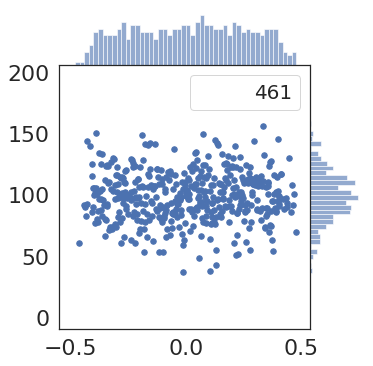

In [7]:
subsampled = np.asarray(subsampling(data_2D,list_desc = [0],cutoff_sig=0.01,rate=0.2, method = "pykdtree",verbose = 1))

plot(subsampled)

### Tutorial 3: Subsample with PCA-preprocessing for high-dimensional dataset

we will demostrate with a 10-D dataset

PCA is first done on the dataset, and first N PCs that captured 99% variance of the 
original dataset are used to subsample the dataset

Note although the dataset is subsampled with PCs, the resulting subsampled dataset is
not PCA transformed

In [8]:
print("without PCA preprocessing")
print("original dataset shape: {}\n\n".format(data_10D.shape))

subsampled = subsampling(data_10D,list_desc = [], cutoff_sig=0.5,rate=0.4, method = "pykdtree",verbose = 1)

print("\n\nresult dataset shape: {}".format(np.array(subsampled).shape))

without PCA preprocessing
original dataset shape: (1000000, 10)


Started NN-subsampling, original length: 1000000
use pykdtree backend
end NN-subsampling. length: 79660	 time:382.07815623283386


result dataset shape: (79660, 10)


In [9]:
print("with PCA preprocessing")
print("original dataset shape: {}\n\n".format(data_10D.shape))

subsampled = subsampling_with_PCA(data_10D,list_desc = [], start_trial_component = 5, max_component = 10, \
                                  target_variance = 0.99, cutoff_sig=0.5,rate=0.4, \
                                  method = "pykdtree",verbose = 1)

print("\n\nresult dataset shape: {}".format(np.array(subsampled).shape))

with PCA preprocessing
original dataset shape: (1000000, 10)


start trial PCA
end trial PCA, number of PC kept: 5 	 took 2.0444438457489014 s
Started NN-subsampling, original length: 1000000
use pykdtree backend
end NN-subsampling. length: 2571	 time:15.506987571716309


result dataset shape: (2571, 10)


### Tutorial 4: Batch subsample with for large dataset

Batch subsampling with 100,000 and 10,000 batch sizes were tested. 2 observations could be made:

1. subsampling based on small batchs sucessfully lowered the cost of the subsampling algorithm
2. seems the resulting sabsampled datasets are much more sparse

#### without batch

Started NN-subsampling, original length: 1000000
use pykdtree backend
end NN-subsampling. length: 1203	 time:12.450016260147095
total time: 12.660449981689453


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


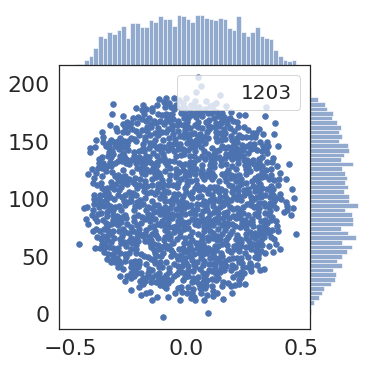

In [10]:
start = time.time()
subsampled = np.array(subsampling(data_2D,list_desc = [], cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = 1))

print("total time: {}".format(time.time()-start))

plot(subsampled)

#### 100,000 datapoints in a batch, with 1 level of batch subsample with final overall
subsample with cutoff_sig = 0.1, rate = 0.2



at recursive level 1, length 1000000
Started NN-subsampling, original length: 100000
use pykdtree backend
end NN-subsampling. length: 814	 time:0.6930944919586182
Started NN-subsampling, original length: 100000
use pykdtree backend
end NN-subsampling. length: 847	 time:0.9774010181427002
Started NN-subsampling, original length: 100000
use pykdtree backend
end NN-subsampling. length: 875	 time:0.9739184379577637
Started NN-subsampling, original length: 100000
use pykdtree backend
end NN-subsampling. length: 880	 time:1.0386650562286377
Started NN-subsampling, original length: 100000
use pykdtree backend
end NN-subsampling. length: 864	 time:1.0126264095306396
Started NN-subsampling, original length: 100000
use pykdtree backend
end NN-subsampling. length: 897	 time:1.0463128089904785
Started NN-subsampling, original length: 100000
use pykdtree backend
end NN-subsampling. length: 904	 time:1.0191550254821777
Started NN-subsampling, original length: 100000
use pykdtree backend
end NN-sub

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


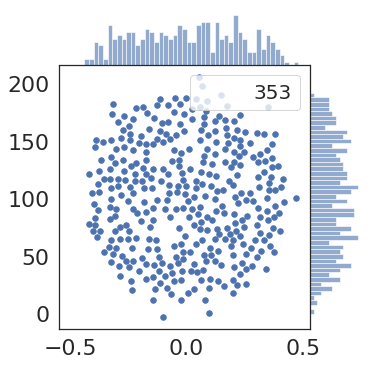

In [11]:
start = time.time()
subsampled = np.array(batch_subsampling(data_2D,list_desc = [], batch_size = 100000, recursive_level = 1, \
                                        cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = 1, \
                                        final_overall_subsample = True))

print("total time: {}".format(time.time()-start))

plot(subsampled)

#### 100,000 datapoints in a batch, with 2 levels of batch subsample without final overall
subsample with cutoff_sig = 0.1, rate = 0.2

total time: 10.671808242797852


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


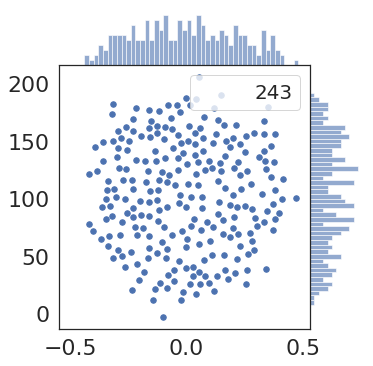

In [12]:
start = time.time()
subsampled = np.array(batch_subsampling(data_2D,list_desc = [], batch_size = 100000, recursive_level = 2, \
                                        cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = 0, \
                                        final_overall_subsample = False))

print("total time: {}".format(time.time()-start))

plot(subsampled)

#### 10,000 datapoints in a batch, with 2 levels of batch subsample without final overall
subsample with cutoff_sig = 0.1, rate = 0.2

total time: 14.391276597976685


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


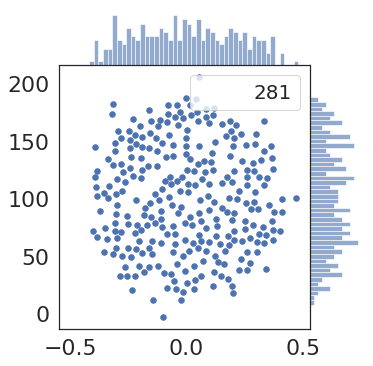

In [13]:
start = time.time()
subsampled = np.array(batch_subsampling(data_2D,list_desc = [], batch_size = 10000, recursive_level = 2, \
                                             cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = 0, \
                                             final_overall_subsample = False))

print("total time: {}".format(time.time()-start))

plot(subsampled)

## Tests

### Test 1: scaling in multiple dimensions with different backend

2 different backends were tested

1. pykdtree backend seems to be very efficient for lower dimension dataset, but scales badly with number of dimensions

2. nmslib backed performed much worse for lower dimension datasets, but scales better with dimension

#### pykdtree backend

In [14]:
temp = np.column_stack((x1,x2))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "pykdtree",verbose = 1)

print("2 dimensions, total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "pykdtree",verbose = 1)

print("5 dimensions,total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "pykdtree",verbose = 1)

print("10 dimensions total time: {}\n\n".format(time.time()-start))

Started NN-subsampling, original length: 1000000
use pykdtree backend
end NN-subsampling. length: 22	 time:12.319318056106567
2 dimensions, total time: 12.495460033416748


Started NN-subsampling, original length: 1000000
use pykdtree backend
end NN-subsampling. length: 204	 time:27.68990468978882
5 dimensions,total time: 27.832138538360596


Started NN-subsampling, original length: 1000000
use pykdtree backend
end NN-subsampling. length: 1497	 time:613.4699428081512
10 dimensions total time: 613.680525302887




#### nmslib backend

In [15]:
temp = np.column_stack((x1,x2))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "nmslib",verbose = 1)

print("2 dimensions, total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "nmslib",verbose = 1)

print("5 dimensions,total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "nmslib",verbose = 1)

print("10 dimensions total time: {}\n\n".format(time.time()-start))

Started NN-subsampling, original length: 1000000
use nmslib backend
end NN-subsampling. length: 22	 time:189.3384256362915
2 dimensions, total time: 189.53035688400269


Started NN-subsampling, original length: 1000000
use nmslib backend
end NN-subsampling. length: 190	 time:341.985910654068
5 dimensions,total time: 342.13572454452515


Started NN-subsampling, original length: 1000000
use nmslib backend
end NN-subsampling. length: 1451	 time:647.4171483516693
10 dimensions total time: 647.6040725708008




### Test 2: MNIST dataset test

MNIST is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database contains 60,000 of 28x28 pixel training images (28x28=784 dimensions per datapoints), corresponding to 10 classes (0-9)

subsampling with PCA pre-processing and different backends.

Ideally we should see roughly same numbers of images per digit

In [34]:
from mlxtend.data import loadlocal_mnist
from matplotlib import pyplot as plt

X, y = loadlocal_mnist(
        images_path='./train-images-idx3-ubyte', 
        labels_path='./train-labels-idx1-ubyte')
MNIST_data = np.column_stack((X,y))
list_desc = list(range(784))

start trial PCA
end trial PCA, number of PC kept: 121 	 took 23.865668058395386 s
Started NN-subsampling, original length: 60000
use nmslib backend
end NN-subsampling. length: 12	 time:22.74717879295349


<BarContainer object of 10 artists>

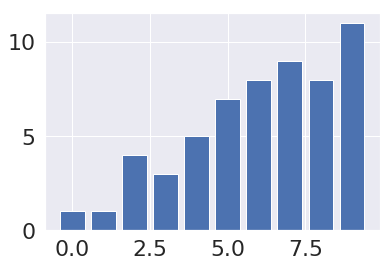

In [35]:
result = subsampling_with_PCA(MNIST_data,list_desc = list_desc,standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.3, method = "nmslib", verbose = 1)

result_plot = list(range(10))
for image in result:
    result_plot[image[-1]] += 1
plt.bar([0,1,2,3,4,5,6,7,8,9],result_plot)

start trial PCA
end trial PCA, number of PC kept: 121 	 took 23.458290576934814 s
Started NN-subsampling, original length: 60000
use annoy backend
end NN-subsampling. length: 8	 time:17.48621368408203


<BarContainer object of 10 artists>

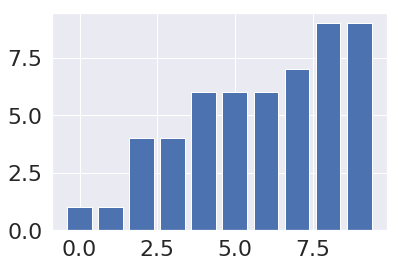

In [36]:
result = subsampling_with_PCA(MNIST_data,list_desc = list_desc,standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.3, method = "annoy", verbose = 1)

result_plot = list(range(10))
for image in result:
    result_plot[image[-1]] += 1
plt.bar([0,1,2,3,4,5,6,7,8,9],result_plot)

### Test 3: fashion-MNIST dataset test

fashion-MNIST is a dataset of Zalando's article imagesâ€”consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image (28x28=784 dimensions per datapoints), associated with a label from 10 classes. 

subsampling with PCA pre-processing and different backends.

Ideally we should see roughly same numbers of images per class

In [37]:
X, y = loadlocal_mnist(
        images_path='./train-fasion-images-idx3-ubyte', 
        labels_path='./train-fasion-labels-idx1-ubyte')
fMNIST_data = np.column_stack((X,y))

start trial PCA
end trial PCA, number of PC kept: 121 	 took 24.212306261062622 s
Started NN-subsampling, original length: 60000
use nmslib backend
end NN-subsampling. length: 11	 time:20.401706218719482


<BarContainer object of 10 artists>

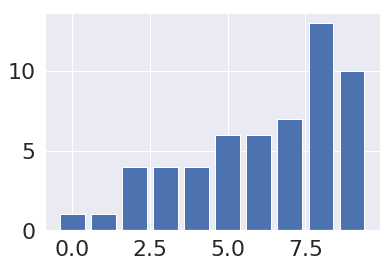

In [38]:
result = subsampling_with_PCA(fMNIST_data,list_desc = list_desc,standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.3, method = "nmslib", verbose = 1)

result_plot = list(range(10))
for image in result:
    result_plot[image[-1]] += 1
plt.bar([0,1,2,3,4,5,6,7,8,9],result_plot)

start trial PCA
end trial PCA, number of PC kept: 121 	 took 24.872873067855835 s
Started NN-subsampling, original length: 60000
use annoy backend
end NN-subsampling. length: 11	 time:19.036969661712646


<BarContainer object of 10 artists>

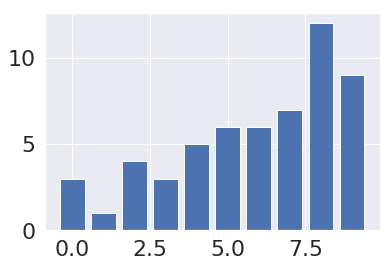

In [39]:
result = subsampling_with_PCA(fMNIST_data,list_desc = list_desc,standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.3, method = "annoy", verbose = 1)

result_plot = list(range(10))
for image in result:
    result_plot[image[-1]] += 1
plt.bar([0,1,2,3,4,5,6,7,8,9],result_plot)